<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Иморт-библиотек:" data-toc-modified-id="Иморт-библиотек:-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Иморт библиотек:</a></span></li><li><span><a href="#Импорт-датасета" data-toc-modified-id="Импорт-датасета-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Импорт датасета</a></span></li></ul></li><li><span><a href="#ИТОГ:" data-toc-modified-id="ИТОГ:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ИТОГ:</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#ИТОГ:" data-toc-modified-id="ИТОГ:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ИТОГ:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b><br>
Павел, доброго дня! рад приветствовать тебя вновь! <br />
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы тебе использовать его для своего дальнейшего успеха) И очень здорово будет, если удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

#### Иморт библиотек:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
RANDOM_STATE = 12345
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

#### Импорт датасета

In [2]:
try:
    data = pd.read_csv('taxi.csv')
    print('датасет загружен локально')
except:
    data = pd.read_csv('/datasets/taxi.csv')
    print('датасет загружен с сервера')

датасет загружен с сервера


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>ОК, данные на базе)<br>

In [3]:
data[:1]

,datetime,num_orders
0,2018-03-01 00:00:00,9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

datetime      0
num_orders    0
dtype: int64

In [7]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y.%m.%d %H:%M:%S')
data = data.set_index('datetime', drop=True)

In [8]:
data[:1]

,num_orders
datetime,
2018-03-01,9


### ИТОГ:
Данные подготовлены

## Анализ

In [9]:
# Проверим датасет на упорядоченность данных
data = data.sort_index()
data.index.is_monotonic

True

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>верно, это важно во временных рядах проверять на последовательность и непрерывность времени!</p>
</div>

<AxesSubplot:xlabel='datetime'>

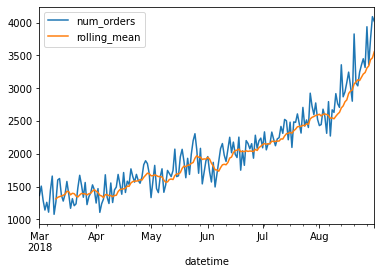

In [10]:
# посмотрим на ресемплированные данные по дням со скользящим средним
data_resample = data.resample('1D').sum()
data_resample['rolling_mean'] = data_resample.rolling(10).mean()
data_resample.plot()

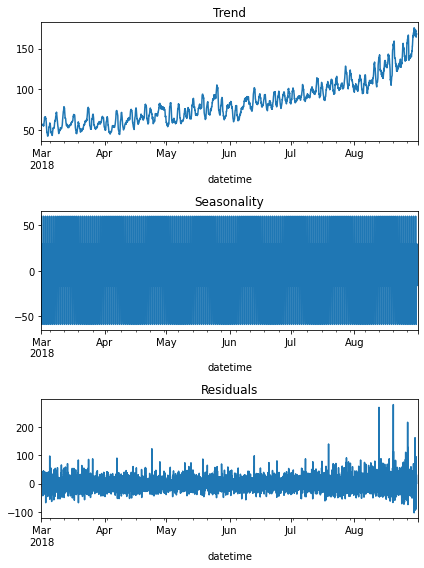

In [11]:
# Построим графики сезонности и тренда
data_resample = data.resample('1H').sum()

decomposed = seasonal_decompose(data_resample)

plt.figure(figsize=(6, 8))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

<AxesSubplot:xlabel='datetime'>

<AxesSubplot:xlabel='datetime'>

<AxesSubplot:xlabel='datetime'>

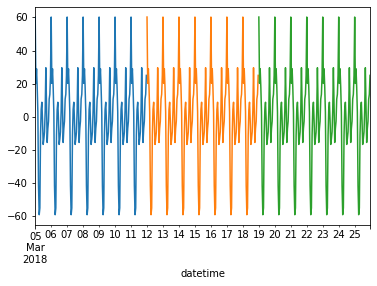

In [12]:
# Посмотрим сезонность в одном месяце по неделям
display(decomposed.seasonal['2018-03-05':'2018-03-11'].plot())
display(decomposed.seasonal['2018-03-12':'2018-03-18'].plot())
display(decomposed.seasonal['2018-03-19':'2018-03-25'].plot())

### ИТОГ:
Видим, что каждую неделю происходит то же самое - в понедельник и пятницу большое кол-во заказов,
а вот по вторникам заказов всегда минимум
Трендовый график показывает что в целом кол-во заказов растет


<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
Исследование - понятно. Отлично!!!<br>Единственное, что заметил бы: его проводят, обычно, на тех же данных, на кооторых нам надо моделировать далее. т.е на агрегации часа<br><font color='green'><br></div>
    
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>    
Инструмент декомпозиции в частности, а графический анализ временных рядов как в принципе - важный этап моделирования рядов.<br> Позволяет увидеть продажи визуально, а это помогает сделать предвариетльные выводы<br>
    
Хочу озвучить ещё такой момент<br>
В реальности бизнеса есть все три вида сезонности:<br>
1) дневная сезонность -  данные собраны по дням, т.е. будни и выходные имеют разные продажи<br>
2) внутрисуточная сезонность: когда продажи утром отличаются от продаж вечером <br>
3) месячная сезонность: когда продажи лета и осени - разные.<br>
И если строить прогноз на длительный период времени, то без учёта всех видов сезонности  - не обойтись<br>
Например: есть в данных восходящий тренд. Но вопрос такой возникает: <br>
этот подъём действительно за счёт роста компании (чаще всего тренд - это отражение роста компании) или есть ещё влияние месячной сезнности? (летом - продаж в рост, например, и именно этот момент мы наблюдаем в данных)<br>
Ответ на вопрос - не протой на имеющихся данных - у нас данных меньше года. А это означает, что месячную сезонность нам не просто вычислить адекватно - т.е. не внести в модель корректтировки месяцев(<br>
Поэтому, я бы дал такой совет:<br>
на горизонте прогнозирования - несколько часов или дней - можно предположить что у нас тренд.<br>
А если строить прогноз на несколько недель - вот тут утверждать наличие тренда надо с большой осторожностью))))<br><br>
Ну, а если вернуться к постановке задаче - построить прогноз на час (очень маленький горизонт), то двух сезонности часовой и дневной - должно хватить.
</font></p></div>

## Обучение

In [13]:
data.sort_index(inplace=True)
dt = data.resample('1H').sum()

def make_features(dt, max_lag, rolling_mean_size):
    dt['dayofweek'] = dt.index.dayofweek
    dt['hour'] = dt.index.hour

    for lag in range(1, max_lag + 1):
        dt['lag_{}'.format(lag)] = dt['num_orders'].shift(lag)
    dt['rolling_mean'] = dt['num_orders'].shift().rolling(rolling_mean_size).mean()

<font color='blue'> <b><u>Согласен, спасибо, поправил!</u></b><br>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p> ОК, есть контакт))

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
Выскажу свою позицию по факторам:<br><br>

1) Фактор год: НЕТ, однозначно не подходит. У нас данных меньше года. Поэтому будет просто константа.<br>
2) Фактор месяц: НЕТ, аналогично году, у нас в истории всего один март, май.... Да и горизоно прогноза - часы. Поэтому сезонность времени года будет просто в тренде уже заложена.<br>
3) Фактор день: НЕТ, также не подходит, будет просто последовательность чисел<br>
4) Фактор день недели: ДА, т.к. у нас есть недельная сезонность<br>
5) Фактор час: ДА, т.к. есть часовая (суточная) сезонность.<br>
6) Факто lag: ДА, это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.<br>
7) Фактор rolling: ДА, это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда <br>

Как ты думаешь?</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p> Сразу пару строк о факторе месяц:<br>
Если нам брать горизонт прогноза месяц или два , то фактор месяц - очень важне  это факт. А если брать горизонт прогноза несколько часов, то фактор времени года - на таком отрезке времени и не заметен. К тому же, он уже присутствует в тренде (скользящем среднем). Т.е. его участие локально как бы и есть.<br>

То, что сейчас месяц может увеличивать точность - это случайно. Он ведь представлен как числа от 1 до 8 и ещё есть тренд, как раз. Т.е. произошло наложение тренда и номера месяца. А вот если продажи буду уходить вниз (или перестанут расти), а мы будем продолжать пользовться моделью, то модель будет предсказывать рост на сентябрь (цифра 9), на октябпрь (цифра 10)... т.е. чиссто числовая тенденция)<br>
    
Поэтому, рекомендация для будущих проетов на эту тему:<br>
Учитывать горизонт прогноза: если задача стоит среднесрочного и долгосрочного прогноза, то месяц нам в помощь (при этом данных должно быть не меннее 2-х / 3-х лет). Если задача краткосрочного прогнозирования - месяц не надо использовать, он уже в тренде заложен.</div>

In [14]:
make_features(dt, 1, 24)

train, test = train_test_split(dt, shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [15]:
# gridsearch с таймингом с вариантом рандомного или точного поиска
tscv = TimeSeriesSplit(n_splits = 10)
def gs_model(model, param_grid, X, y):
    gs = GridSearchCV(
        model,
        param_grid = param_grid,
        scoring='neg_root_mean_squared_error',
        n_jobs=16,
        cv=tscv # отключим кросс-валидацию для гридсерч так как мы исследуем временные ряды
    )
    gs.fit(X, y)
    # лучшее значение RMSE на кросс-валидации
    print(f'best_score: {gs.best_score_ * -1}')
    # лучшие гиперпараметры
    print(f'best_params: {gs.best_params_}')
    print(f'best_time: {gs.refit_time_}')
    return gs.best_score_* -1, gs.refit_time_

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️  КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
А можно не отключать. Нам же удобно использовать кросс-валидацию. Можем воспользоватся методами из sklearn:	<br><br>
tscv = TimeSeriesSplit(n_splits=8)(надо посмотерть, как подобрать параметр и аргументировать)<br>
gsearch = GridSearchCV(gbm, param_grid=param_set, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=tscv, verbose=1)<br><br>
grid.best_score_ - выдаст нам сразу валидированную метрику. Нет смысла делать код, который ниже. Именно эту метрику можено будет брать и сравнивать с другими моделями!<br>
А так - мы сейчас обучаем на тех же данных, что и проверяем потом. Поэтому метрика чуть завышена для сранений)

In [16]:
# model Ridge
model_ridge = Ridge()
parameters_cat = {
    'alpha': np.arange(0, 0.21, 0.01)}
ridge_rmse_train, ridge_rmse_time = gs_model(model_ridge, parameters_cat, features_train, target_train)

best_score: 30.90708535540955
best_params: {'alpha': 0.0}
best_time: 0.007826805114746094


In [17]:
# model CatBoostRegressor
model_cat = CatBoostRegressor(verbose=False)
parameters_cat = {
    'iterations': np.arange(1, 100, 10),
    'depth': np.arange(1, 10, 1)}
cat_rmse_train, cat_rmse_time = gs_model(model_cat, parameters_cat, features_train, target_train)

best_score: 14.771539346576626
best_params: {'depth': 9, 'iterations': 91}
best_time: 1.411350965499878


In [117]:
# model LGBM
model_lgb = lgb.LGBMRegressor()
parameters = {
    'n_estimators': np.arange(1, 100, 10),
    'max_depth': np.arange(1, 10, 2)}
lgb_rmse_train, lgb_rmse_time = gs_model(model_lgb, parameters, features_train, target_train)

In [118]:
# создадим таблицу с результатами
d = {
    'Model': ['LinearRegression', 'LightGBM', 'CatBoost'],
    'RMSE train': [ridge_rmse_train, lgb_rmse_train , cat_rmse_train],
    'Time': [ridge_rmse_time, lgb_rmse_time, cat_rmse_time]}
result = pd.DataFrame(data=d)
result

,Model,RMSE train,Time
0,LinearRegression,30.907085,0.003392
1,LightGBM,17.743441,1.617312
2,CatBoost,14.771539,0.219673


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Есть такое ещё мнение , что эти парамтры - не то, что надо подбирать перебором.:<br>
Lag: его называют ещё параметром авторегрессии. На бытовом уровне его можно понять так: допустим вчера мы собрались с друзьями и не много закусили.... повлияет ли это на сегодняшний настрой на жизнь? Скорее да)))) Так вот с авторегрессией также. Допустим lag=1 - учитывает (для удобства будем считать, что продажи собраны по дням) как вчерашние продажи - вчерашние события - воалияли на сегоняшние.Lag=2: учитывает как позавчерашние продажи влияютна сегодняшние.....<br>

По скользящему среднего:<br>
Предположим rolling=10 - скользящее среднее. По сути, ищем среднее по 10 точкам, потом следующие 10 точек, и т.д. - это некое подобие тренда будет - средней линии. Т.е. - сглаживание колебаний/выбросов. Это легко увидеть на пределе: допустим длина ряда 100 дней. rolling(100) - это просто одно число - среднее всего ряда. <br>

Поэтому, если выставить сезонности - hour и деньНедели, то дополнительные факторы могут быть такие: лаг =1 (максимум 2), а скользящее среднее = 24 (среднее за сутки). Т.е. начинать с этого. В итоге модель будет приемлемая по точности и не много факторов.. а это значит и для бизнеса будет легче доносить решение)</div>

## Тестирование

In [119]:
# Лучшая модель - CatBoostRegressor, посмотрим на тесте:
model_cat = CatBoostRegressor(depth=9, iterations=191, verbose=False)
model_cat.fit(features_train, target_train)
probs = model_cat.predict(features_test)
rmse_catboost_test = mean_squared_error(probs, target_test, squared=False)
rmse_catboost_test

45.30039698924529

## Выводы

<AxesSubplot: xlabel='datetime'>

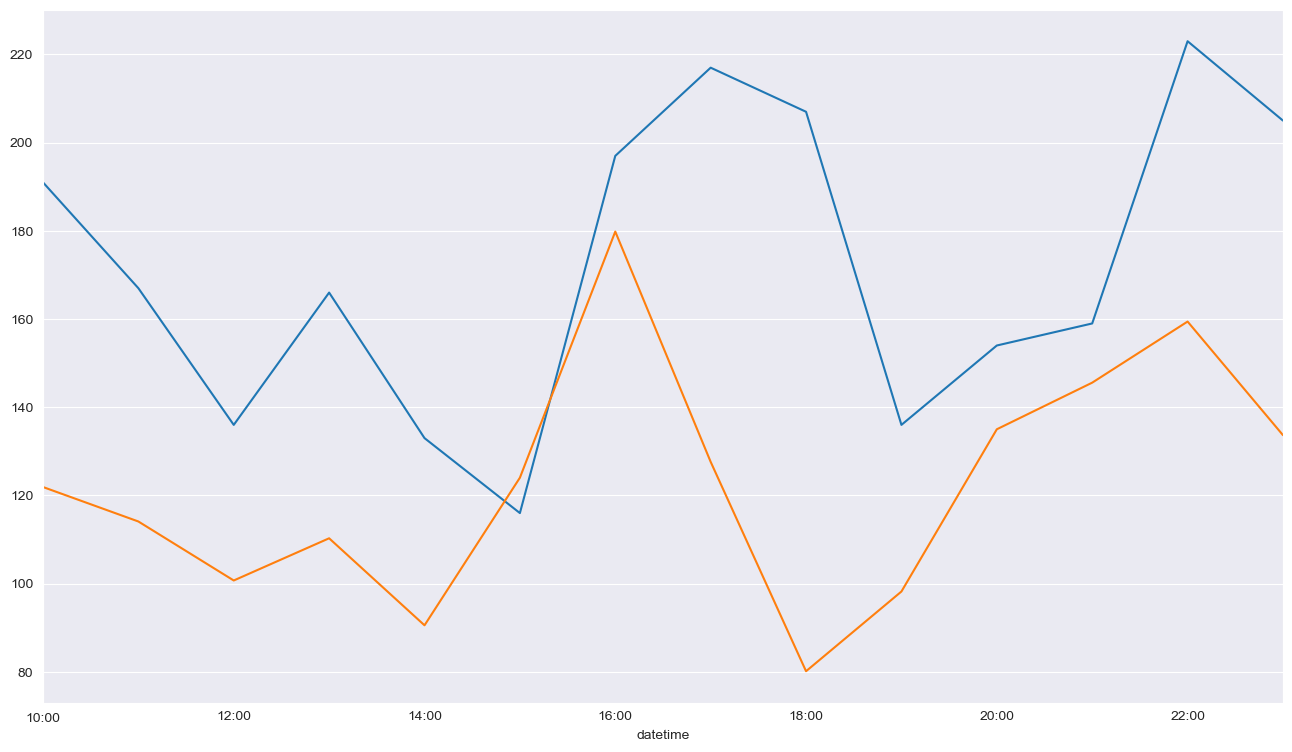

In [120]:
# Построим график фактов и предсказаний на одном рисунке
probs = pd.Series(probs, index=target_test.index)
plt.figure(figsize=(16,9))
target_test.tail(14).plot()
probs.tail(14).plot()

***на графике видно что мы предсказываем заниженно - это от того что бустинг и деревья плохо учитывают экстраполированные данные? То есть мы не поспеваем за общим трендом бизнеса? Сам характер предсказанной линии верный - но он как будто смещен вниз.***

<font color='blue'> <b><u>Согласен, спасибо, поправил!</u></b><br>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
ОК, Павел, увидел корректировки. Принято. Молодец, что удалось тебе всё сделать. Единственное, оставил комментарий по кросс-валидации для временных рядов. Её правильнее бы поиспользовать)<br><br>
C графиком - ОК. Глядя на него, а также добавляя отдельный анализ остатков, можно будет хорошо порабоать над улучшением модели..<br>
Например, сейчас видно, что на тесте  прогноз систематически ниже факта. Это означает, что модель перестаёт работать как надо. Хотя метрика в норме.<br>
Причина? На рынке появился новый фактор продаж: цена, "умер" конкурент.... Из-за которого начал меняться тренд. А на трайне мы обучались без него. По хорошем, надо бы поработать ещё с моделью. Но это другая история)))<br>

Тут много ещё что можно сказать по самой теме...<br>
Если будет возможность тебе однозначно интересно посмотреть разные практические истории вот здесь:<br>
https://ibf.org/knowledge - заморский институт бизнес-прогнозирования.<br>
Там и статьи можно накопать, и методы посмомтерть...<br>

Есть классический труд (он НЕ ML, а исключительно на эксель). Но для понимания сути временных рядов - то, что надо:<br>
УИЧЕРН "Бизнес-прогнозирование"<br>

Идеологически по системе прогнозирования, интересно почитать<br>
ТОМАС УОЛЛАС, Р. СТАЛЬ "планирование продаж и операций" SO&P<br><br>     

Спасибо за проект)<br>
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБЧЕНИЯ!</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Интересное лаконичное решение!!!!!! Как-то быстро всё закончилось))) Но пару моментов должен отметить. Они важны для дальнейшей работы в этой специальности!!!!<br>
1) Нет подбора гипрепарамтеров самой модели (я не про лаги и скользящее среднее). А стоит тоже в этом спритне их сделать! <br>       
2) Сообщество рекомендует так: сначала все модели изучаем на трайн-периоде. Потом вводим результирующую таблицу и выбираем лучшую. И ТОЛЬКО её и тестируем на тесте. Давай и здесь так сделаем, это будет правильнее. ТУт- результат трайновых испытаний. А далее - ТОЛЬКО одну пропускаем)</p>
</div>

## Общий вывод:
Модели бустинга выдают хороший результат на данном датасмете, но при постоянном использовании
придется учитывать то, что такие модели плохо реагируют на тренды, но я так понимаю эта тема другого спринта)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
ОК, Павел, с модельной частью тебе удалось справиться хорошо!<br>
Видно, что этот скил уже достаточно сильный. А оформление выводов - отдельная история!!! МОЛОДЕЦ.<br>
Метрика - ОК. Но не понятно, если честно, а хороша ли эта модель в плане предсказания? Для этого лучше построить дополнительно график (чуть ниженаписал об этом).<br>
    
И если сутейно рассуждать, то временные ряды стоят особняком во всём курсе, я бы сказал. Тут чуть иная модельная философия. Имменно поэтому позволял себе оставлять большие рассуждения, чтобы как-то раскрыть её особенности.<br>
<font color='red'>        
Оставил несколько важных комментариев в тексте. Готов буду ответить на твои вопросы!<br>
    
Также попрошу вот что:<br>
Выведи, пожалуйста графики факт/предсказанное на одном рисунке (обычный линейный график). Чтобы увидеть где основные не "попадалки" модели. Это один из важнейших инструментов анализа результатов моделирования временных рядов.<br>
Лучше выбрать масштаб, скажем, несколько дней, чтобы увиеть можо было и сравнить каждый час.<br>    
<font color='green'>
Спасибо)<BR>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ</div> 

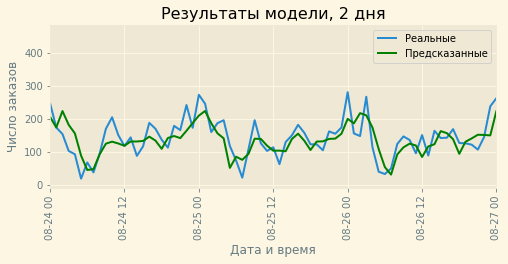

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48